 Project Root Found: C:\Users\monte\Documents\CondaWood
   Loading File: C:\Users\monte\Documents\CondaWood\data\InventWood\Superwood-ID22s-07302025.csv


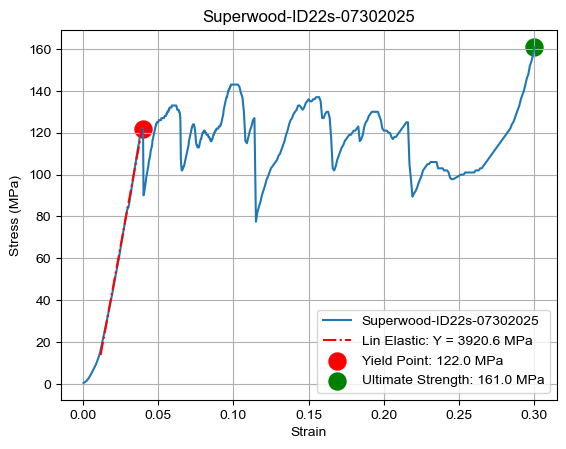

,Value
YoungsModulus (MPa),3920.56
YieldStress (MPa),122.00
YieldStrain (%),3.97
UltimateStress (MPa),161.00
UltimateStrain (%),30.00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scripts.analysis_tools import Analysis


# Configure matplotlib to use a standard font
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'sans-serif']


def find_project_root(marker_file='.project_root'):
    """
    Searches upwards from the current directory to find the project root,
    identified by the presence of a marker file.
    """
    current_path = os.getcwd()  # Start from the notebook's directory
    while True:
        if os.path.exists(os.path.join(current_path, marker_file)):
            return current_path  # Found the root
        parent_path = os.path.dirname(current_path)
        if parent_path == current_path:
            # Reached the filesystem root, marker not found
            raise FileNotFoundError(f"Project root marker '{marker_file}' not found.")
        current_path = parent_path

# Find the root and construct the path
try:
    project_root = find_project_root()
    File = "Superwood-ID22s-07302025.csv"
    # This path is now ALWAYS correct, regardless of where the notebook is.
    File_Path = os.path.join(project_root, 'data', 'InventWood', File)

    print(f" Project Root Found: {project_root}")
    print(f"   Loading File: {File_Path}")
except FileNotFoundError as e:
    print(f" Error: {e}")
    # Stop execution or handle the error appropriately
    # For example: df = None


## Pre-Processing ##
df = pd.read_csv(File_Path)

## Advanced Plotting w/ Auto Yield
fig, Tax = plt.subplots()
sample = Analysis(df,File[:-4],Ax = Tax)
plt.show()
sample.returnMatProperties()